# Task 5

In [ ]:
import sqlite3, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

db_path = "d:\Murtaza\Elevvo internship\Tasks\Task 5\Chinook_Sqlite.sqlite\Chinook_Sqlite.sqlite"
conn = sqlite3.connect(db_path)

def run(sql):
    return pd.read_sql(sql, conn)

In [52]:
sql = """-- Top-selling products (Tracks) by revenue
WITH revenue AS (
  SELECT
    il.TrackId,
    SUM(il.UnitPrice * il.Quantity) AS revenue
  FROM InvoiceLine il
  GROUP BY il.TrackId
)
SELECT
  t.TrackId,
  t.Name AS track_name,
  a.Title AS album_title,
  ar.Name AS artist_name,
  ROUND(r.revenue, 2) AS revenue
FROM revenue r
JOIN Track t   ON t.TrackId = r.TrackId
JOIN Album a   ON a.AlbumId = t.AlbumId
JOIN Artist ar ON ar.ArtistId = a.ArtistId
ORDER BY r.revenue DESC
LIMIT 20;"""
df_top_tracks = run(sql)
df_top_tracks

,TrackId,track_name,album_title,artist_name,revenue
0,2832,The Woman King,"Battlestar Galactica, Season 3",Battlestar Galactica,3.98
1,2850,The Fix,"Heroes, Season 1",Heroes,3.98
2,2868,Walkabout,"Lost, Season 1",Lost,3.98
3,3177,Hot Girl,"The Office, Season 1",The Office,3.98
4,3200,Gay Witch Hunt,"The Office, Season 3",The Office,3.98
5,3214,Phyllis's Wedding,"The Office, Season 3",The Office,3.98
6,3223,How to Stop an Exploding Man,"Heroes, Season 1",Heroes,3.98
7,3250,Pilot,Aquaman,Aquaman,3.98
8,2820,Occupation / Precipice,"Battlestar Galactica, Season 3",Battlestar Galactica,1.99
9,2821,"Exodus, Pt. 1","Battlestar Galactica, Season 3",Battlestar Galactica,1.99


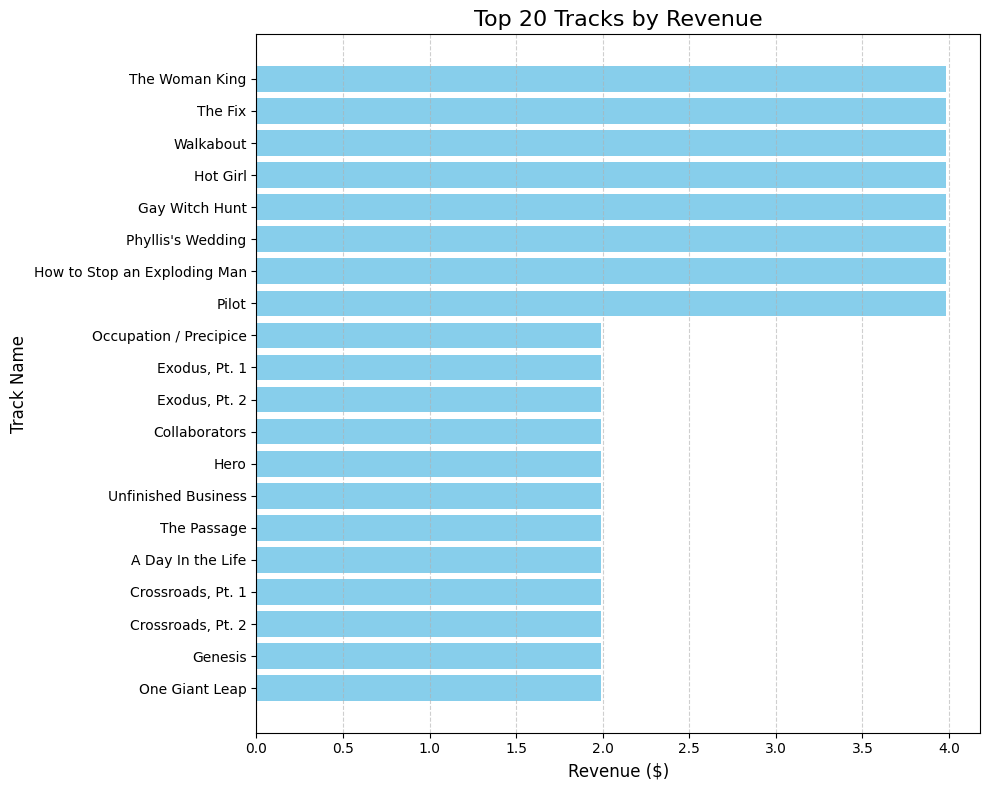

In [59]:
# Plot Top 20 Tracks by Revenue
plt.figure(figsize=(10,8))
plt.barh(df_top_tracks['track_name'], df_top_tracks['revenue'], color='skyblue')

# Improve readability
plt.gca().invert_yaxis()  # highest revenue at top
plt.title('Top 20 Tracks by Revenue', fontsize=16)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Track Name', fontsize=12)

# Add grid for clarity
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

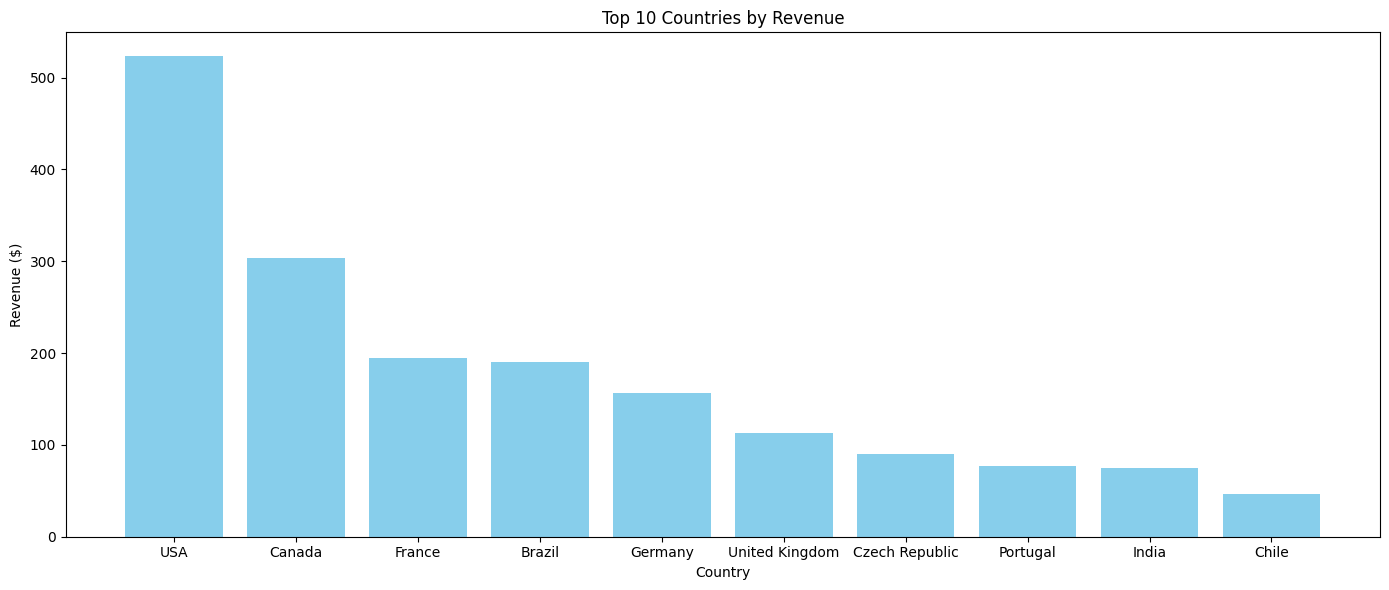

In [51]:
# Query: Revenue by country
sql_country_revenue = """
SELECT 
    i.BillingCountry AS country,
    ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS revenue
FROM InvoiceLine il
JOIN Invoice i ON il.InvoiceId = i.InvoiceId
GROUP BY i.BillingCountry
ORDER BY revenue DESC
LIMIT 10;
"""

df_country = pd.read_sql_query(sql_country_revenue, conn)
sql_country_revenue

# Plot Top 10 Countries by Revenue
plt.figure(figsize=(14,6))
plt.bar(df_country['country'], df_country['revenue'], color='skyblue')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

In [45]:
sql = """-- Revenue per billing country (region)
SELECT
  i.BillingCountry AS country,
  ROUND(SUM(i.Total), 2) AS revenue
FROM Invoice i
GROUP BY i.BillingCountry
ORDER BY revenue DESC;"""
df_region = run(sql)
df_region

,country,revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


In [46]:
sql = """-- Monthly performance (revenue by month, SQLite)
SELECT
  strftime('%Y-%m', i.InvoiceDate) AS year_month,
  ROUND(SUM(i.Total), 2) AS revenue
FROM Invoice i
GROUP BY strftime('%Y-%m', i.InvoiceDate)
ORDER BY year_month;"""
df_monthly = run(sql)
df_monthly.head(15)

,year_month,revenue
0,2009-01,35.64
1,2009-02,37.62
2,2009-03,37.62
3,2009-04,37.62
4,2009-05,37.62
5,2009-06,37.62
6,2009-07,37.62
7,2009-08,37.62
8,2009-09,37.62
9,2009-10,37.62


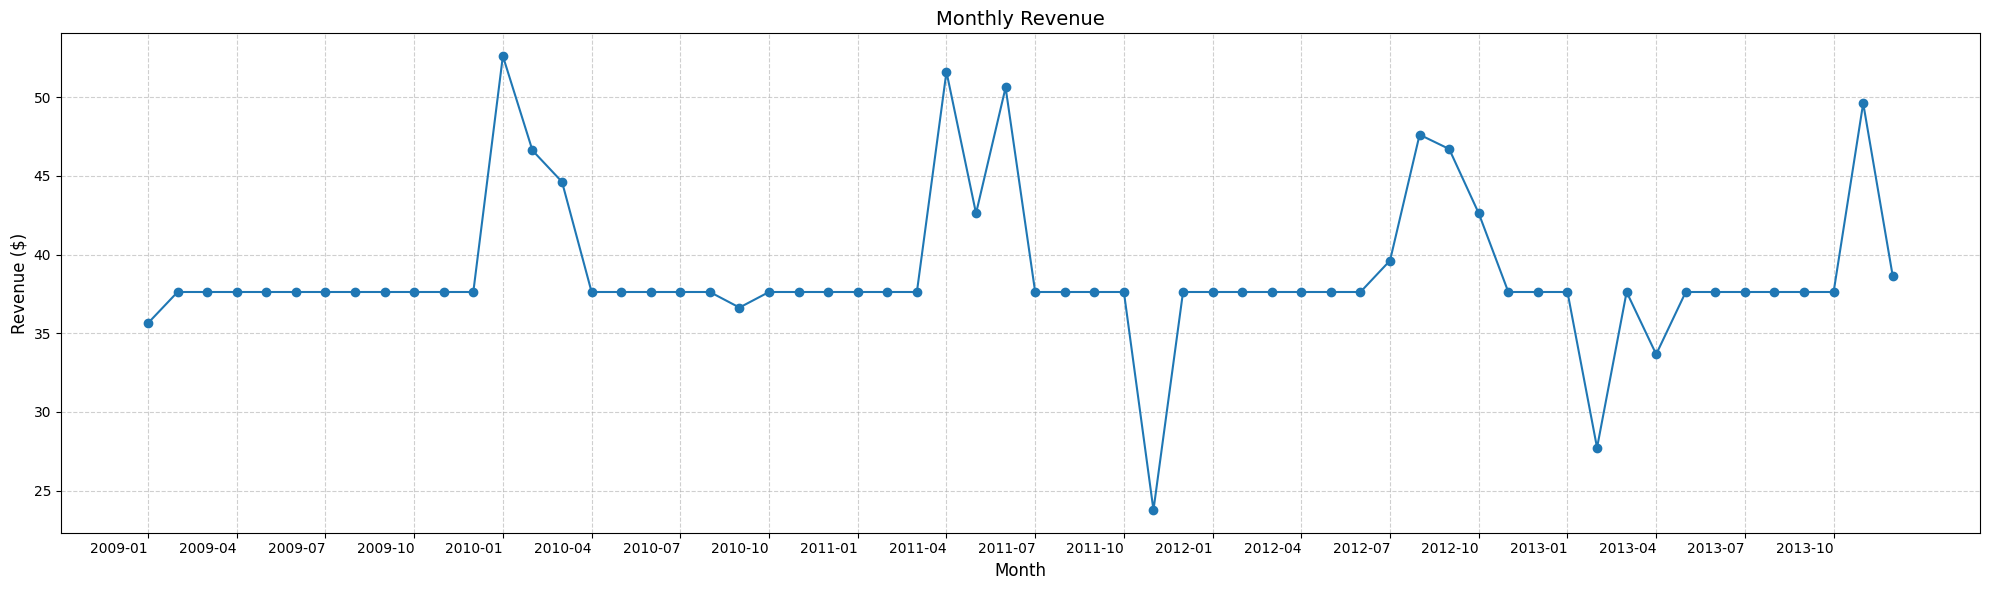

In [35]:
plt.figure(figsize=(20,6))
plt.plot(df_monthly['year_month'], df_monthly['revenue'], marker='o')

# Every 3rd month label
plt.xticks(ticks=df_monthly.index[::3], 
           labels=df_monthly['year_month'][::3], 
           ha='right')

plt.title('Monthly Revenue', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
sql = """-- JOIN-heavy reusable view combining product + sales context
CREATE VIEW IF NOT EXISTS v_sales_product AS
SELECT
  il.InvoiceLineId,
  i.InvoiceId,
  i.InvoiceDate,
  i.BillingCountry,
  c.CustomerId,
  c.FirstName || ' ' || c.LastName AS customer_name,
  t.TrackId,
  t.Name AS track_name,
  g.Name AS genre_name,
  a.AlbumId,
  a.Title AS album_title,
  ar.ArtistId,
  ar.Name AS artist_name,
  il.UnitPrice,
  il.Quantity,
  (il.UnitPrice * il.Quantity) AS line_revenue
FROM InvoiceLine il
JOIN Invoice  i  ON i.InvoiceId  = il.InvoiceId
JOIN Customer c  ON c.CustomerId = i.CustomerId
JOIN Track    t  ON t.TrackId    = il.TrackId
LEFT JOIN Genre g ON g.GenreId   = t.GenreId
JOIN Album    a  ON a.AlbumId    = t.AlbumId
JOIN Artist   ar ON ar.ArtistId  = a.ArtistId;"""
cur = conn.cursor()
cur.executescript(sql)
conn.commit()

# Revenue by artist per month
sql_view_use = '''
SELECT
  strftime('%Y-%m', InvoiceDate) AS year_month,
  artist_name,
  ROUND(SUM(line_revenue), 2) AS revenue
FROM v_sales_product
GROUP BY year_month, artist_name
ORDER BY year_month, revenue DESC
;
'''
run(sql_view_use)

,year_month,artist_name,revenue
0,2009-01,AC/DC,5.94
1,2009-01,Aerosmith,3.96
2,2009-01,Audioslave,2.97
3,2009-01,Caetano Veloso,1.98
4,2009-01,Body Count,1.98
...,...,...,...
661,2013-12,Zeca Pagodinho,1.98
662,2013-12,Vinícius De Moraes,1.98
663,2013-12,Lenny Kravitz,1.98
664,2013-12,Velvet Revolver,0.99


In [ ]:
sql = """-- Bonus: Window function (Top 3 tracks per country by revenue)
WITH track_country AS (
  SELECT
    i.BillingCountry AS country,
    t.TrackId,
    t.Name AS track_name,
    SUM(il.UnitPrice * il.Quantity) AS revenue
  FROM InvoiceLine il
  JOIN Invoice i ON i.InvoiceId = il.InvoiceId
  JOIN Track t   ON t.TrackId   = il.TrackId
  GROUP BY i.BillingCountry, t.TrackId, t.Name
),
ranked AS (
  SELECT
    country,
    TrackId,
    track_name,
    revenue,
    RANK() OVER (PARTITION BY country ORDER BY revenue DESC) AS rnk
  FROM track_country
)
SELECT country, track_name, ROUND(revenue, 2) AS revenue, rnk
FROM ranked
WHERE rnk <= 3
ORDER BY country, rnk, track_name;"""
df_bonus = run(sql)
countries = df_bonus['country'].drop_duplicates()
df_bonus[df_bonus['country'].isin(countries)]

,country,track_name,revenue,rnk
0,Argentina,Battery,0.99,1
1,Argentina,Better Than You,0.99,1
2,Argentina,Cabeça Dinossauro,0.99,1
3,Argentina,Canário Do Reino,0.99,1
4,Argentina,Chemical Wedding,0.99,1
...,...,...,...,...
892,United Kingdom,Where Eagles Dare,0.99,1
893,United Kingdom,Where The River Goes,0.99,1
894,United Kingdom,Whole Lotta Love (Medley),0.99,1
895,United Kingdom,Zither,0.99,1
